In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm.auto import tqdm
from matplotlib.path import Path
import ast
import pickle
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import networkx as nx
from collections import Counter
import nxviz as nv


/home/jupyter-psillano/.local/lib/python3.7/site-packages/nxviz/__init__.py:29: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  """


# Analysis

In [5]:
l = {}
threshold = [1,2,3,4,5,10,15,20,50,100,200]


for t in threshold:
    count = 0 
#    fh=open('output/network_france_germany.csv','r')
    fh=open('network_random_arts.csv','r')

    for line in fh.readlines():
        s=line.strip().split(',')
        if int(s[2]) > t:
            count = count + 1
    l[t] = count
l

{1: 859300,
 2: 474220,
 3: 309404,
 4: 219839,
 5: 165041,
 10: 59481,
 15: 30338,
 20: 18473,
 50: 2876,
 100: 268,
 200: 9}

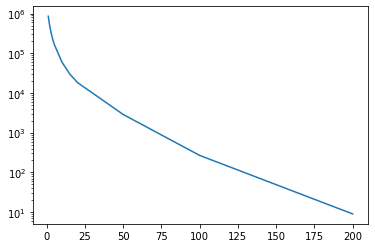

In [3]:
plt.semilogy(l.keys(),l.values())

In [9]:
def load_graph(MIN_TILES):
    G=nx.Graph()
    fh=open('network_random_arts.csv','r')
    #fh=open('network_france_germany.csv','r')


    for line in fh.readlines():
        s=line.strip().split(',')
        if int(s[2]) >= MIN_TILES :
            G.add_edge(str(s[0]),int(s[1]),weight = int(s[2]))
    fh.close()  
    return G

In [15]:
def max_min_tiles(guess):
    # trova il massimo numero minimo di tiles messe da un utente per cui abbiamo una componente sola!
    G = load_graph(guess)
    n_comps = len([c for c in nx.connected_components(G)])
    MIN_TILES = guess
    while n_comps > 1 :
        G  = load_graph(MIN_TILES)
        n_comps = len([c for c in nx.connected_components(G)])        
        MIN_TILES = MIN_TILES -  5

    return G, MIN_TILES

In [52]:
G,MIN_TILES = max_min_tiles(50)
MIN_TILES

ValueError: invalid literal for int() with base 10: ' destroyed)'

In [26]:
MIN_TILES = 3

In [71]:
import random
G=nx.Graph()
#fh=open('output/network_france_germany.csv','r')
fh=open('network_random_arts.csv','r')


for line in fh.readlines():
    s=line.strip().split(',')
    if int(s[2]) > MIN_TILES:
        if random.random() < 1:
            G.add_edge(str(s[0]), int(s[1]), weight = int(s[2]))
fh.close()  

In [72]:
len(G.nodes)

292270

In [29]:
G.get_edge_data('1', 391544)

{'weight': 84}

In [30]:
counter = 0
for node in G.nodes:
    if isinstance(node, str):
        counter += 1
counter
print('abbiamo ',counter,' artworks e ', len(G.nodes) - counter, ' utenti' )

abbiamo  25  artworks e  292245  utenti


In [31]:
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[292270]

In [113]:
if len([len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]) > 1:
    S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
G = nx.Graph(S[0])

In [6]:
for n, d in A.nodes(data=True):
    print(n,d)
    break

NameError: name 'A' is not defined

In [98]:
for (u, v, d) in G.edges(data=True):
    print(u,v,d)
    break

1 391544 {'weight': 84}


In [94]:
for (u, v, d) in G.edges(data=True):
    d["weight"] = 1
    print(u,v,d)
    break

0 2 {'weight': 1}


# plot delle proiezioni
## proiezioni arts
### proiezioni unweighted

In [73]:
arts = nx.bipartite.sets(G)[0]
users = nx.bipartite.sets(G)[1]
len(arts), len(users)

(25, 292245)

In [74]:
A = bipartite.projected_graph(G,arts)

In [79]:
for n, d in A.nodes(data=True):
    A.nodes[n]["degree"] = A.degree()[n] / 25
    

In [80]:
A.nodes(data=True)

NodeDataView({'16': {'degree': 0.88}, '13': {'degree': 0.96}, '18': {'degree': 0.88}, '4': {'degree': 0.88}, '19': {'degree': 0.88}, '10': {'degree': 0.96}, '2': {'degree': 0.96}, '25': {'degree': 0.88}, '23': {'degree': 0.84}, '22': {'degree': 0.84}, '15': {'degree': 0.84}, '3': {'degree': 0.96}, '8': {'degree': 0.76}, '24': {'degree': 0.84}, '9': {'degree': 0.96}, '12': {'degree': 0.64}, '11': {'degree': 0.96}, '7': {'degree': 0.92}, '20': {'degree': 0.88}, '5': {'degree': 0.92}, '1': {'degree': 0.72}, '17': {'degree': 0.96}, '6': {'degree': 0.92}, '21': {'degree': 0.96}, '14': {'degree': 0.96}})

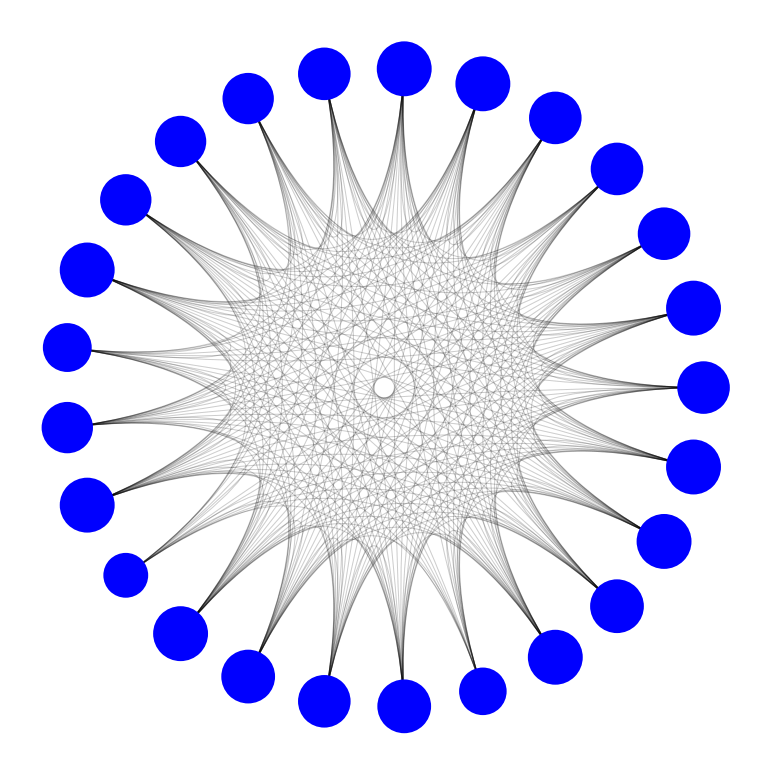

<Figure size 432x288 with 0 Axes>

In [88]:
plt.figure(figsize=(20,14))
nv.circos(
    A,
    node_size_by= 'degree',
    #group_by="group",
    #node_color_by="group",
    #edge_alpha_by="weight",#transparency
    #edge_lw_by="weight",    # linewidth of the edges
    node_enc_kwargs={"size_scale": 0.7}
)

plt.show()
plt.savefig('projections/arts_unweighted.png',dpi = 300)

# proiezioni weighted

In [89]:
A = bipartite.weighted_projected_graph(G,arts)

In [90]:
for n, d in A.nodes(data=True):
    A.nodes[n]["degree"] = A.degree()[n] / 25
for (u, v, d) in A.edges(data=True):
    d["weight"] =  d["weight"] / 25

In [91]:
A.nodes(data=True)

NodeDataView({'16': {'degree': 0.88}, '13': {'degree': 0.96}, '18': {'degree': 0.88}, '4': {'degree': 0.88}, '19': {'degree': 0.88}, '10': {'degree': 0.96}, '2': {'degree': 0.96}, '25': {'degree': 0.88}, '23': {'degree': 0.84}, '22': {'degree': 0.84}, '15': {'degree': 0.84}, '3': {'degree': 0.96}, '8': {'degree': 0.76}, '24': {'degree': 0.84}, '9': {'degree': 0.96}, '12': {'degree': 0.64}, '11': {'degree': 0.96}, '7': {'degree': 0.92}, '20': {'degree': 0.88}, '5': {'degree': 0.92}, '1': {'degree': 0.72}, '17': {'degree': 0.96}, '6': {'degree': 0.92}, '21': {'degree': 0.96}, '14': {'degree': 0.96}})

In [ ]:
A.edges(data=True)

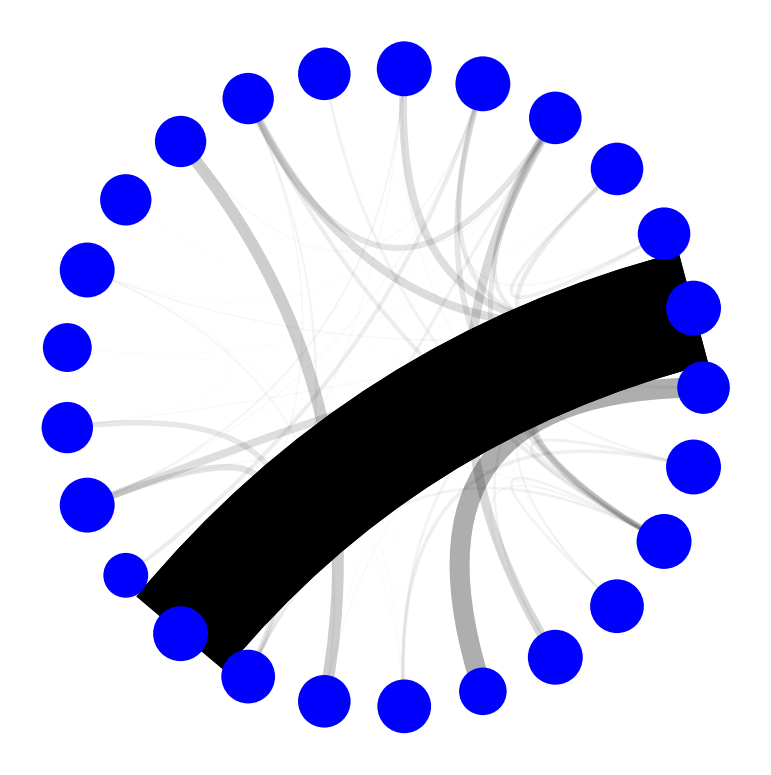

<Figure size 432x288 with 0 Axes>

In [95]:
plt.figure(figsize=(20,14))
nv.circos(
    A,
    #group_by="group",
    #node_color_by="group",
    node_size_by= 'degree',
    edge_alpha_by="weight",#transparency
    edge_lw_by="weight",    # linewidth of the edges
    node_enc_kwargs={"size_scale": 0.7}
)

plt.show()
plt.savefig('projections/arts_weighted.png',dpi = 300)

# proiezioni weighted 2nd method

In [97]:
A = bipartite.collaboration_weighted_projected_graph(G,arts)

In [98]:
for n, d in A.nodes(data=True):
    A.nodes[n]["degree"] = A.degree()[n] / 25
for (u, v, d) in A.edges(data=True):
    d["weight"] =  d["weight"] / 25

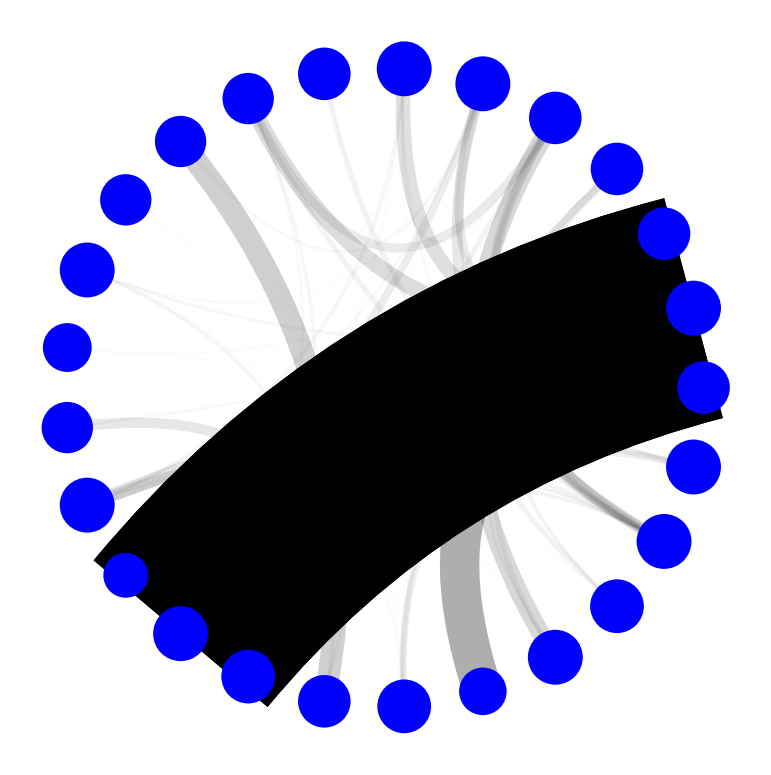

<Figure size 432x288 with 0 Axes>

In [99]:
plt.figure(figsize=(20,14))
nv.circos(
    A,
    #group_by="group",
    #node_color_by="group",
    node_size_by= 'degree',
    edge_alpha_by="weight",#transparency
    edge_lw_by="weight",    # linewidth of the edges
    node_enc_kwargs={"size_scale": 0.7}
)

plt.show()
plt.savefig('projections/arts_weighted_2nd.png',dpi = 300)

In [3]:
# adding labels to nodes
name = []
arts = pd.read_csv('name_arts.csv')
for row in arts.itertuples():
    name.append(row.name)
    
for n, d in A.nodes(data=True):
    A.nodes[n]["label"] = name[int(n)]

NameError: name 'A' is not defined

In [12]:
plt.figure(figsize=(10,7))
nv.circos(
    A,
    #group_by="group",
    #node_color_by="group",
    node_labels=True,
    edge_alpha_by="weight",#transparency
    edge_lw_by="weight",    # linewidth of the edges
    node_enc_kwargs={"size_scale": 0.3}
)

plt.show()

TypeError: base() got an unexpected keyword argument 'node_labels'

<Figure size 720x504 with 0 Axes>

In [ ]:
    node_labels=True,
    group_label_position="middle",
    group_label_color=True,
    group_label_offset=2,


# plot users

In [ ]:
arts = nx.bipartite.sets(G)[0]
users = nx.bipartite.sets(G)[1]
len(arts), len(users)

In [154]:
#U = bipartite.projected_graph(G,users)
U = bipartite.weighted_projected_graph(G,users)
#U = bipartite.collaboration_weighted_projected_graph(G,users)

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10,7))
nv.circos(
    U,
    #group_by="group",
    #node_color_by="group",
    edge_alpha_by="weight",#transparency
    edge_lw_by="weight",    # linewidth of the edges
    node_enc_kwargs={"size_scale": 0.1}
)

plt.show()

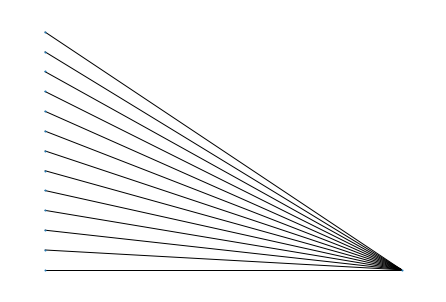

In [115]:
pos = nx.bipartite_layout(G, arts)
nx.draw(G,pos,node_size=1)
plt.savefig('plot/bipartite_net.png',dpi = 300,backend = 'cairo')

In [46]:
B = nx.Graph()
B.add_edges_from([("a", 1), ("b", 1), ("a", 2), ("b", 2)])
G = bipartite.projected_graph(B, ["a", "b"], multigraph=True)
print([sorted((u, v)) for u, v in G.edges()])
nodes = nx.bipartite.sets(B)[0]


[['a', 'b'], ['a', 'b']]


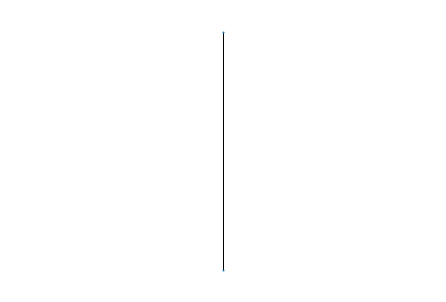

In [48]:
pos = nx.bipartite_layout(B,nodes)
nx.draw(G,pos,node_size=1)


In [76]:
A.edges

EdgeView([('19', '21'), ('19', '2'), ('19', '6'), ('19', '13'), ('19', '7'), ('21', '15'), ('21', '3'), ('21', '9'), ('21', '12'), ('21', '6'), ('21', '5'), ('21', '7'), ('21', '23'), ('21', '14'), ('21', '10'), ('21', '2'), ('21', '13'), ('21', '25'), ('21', '8'), ('9', '10'), ('9', '11'), ('9', '7'), ('9', '18'), ('24', '23'), ('24', '3'), ('24', '13'), ('24', '7'), ('24', '18'), ('12', '10'), ('12', '13'), ('6', '10'), ('6', '13'), ('6', '11'), ('6', '18'), ('6', '8'), ('22', '20'), ('22', '11'), ('5', '20'), ('5', '14'), ('5', '3'), ('18', '10'), ('18', '13'), ('18', '8'), ('20', '3'), ('20', '2'), ('20', '17'), ('20', '7'), ('1', '16'), ('1', '17'), ('14', '2'), ('14', '7'), ('4', '3'), ('4', '13'), ('4', '8'), ('3', '10'), ('3', '2'), ('3', '16'), ('3', '13'), ('3', '8'), ('16', '2'), ('16', '13'), ('16', '17'), ('16', '11'), ('11', '13'), ('7', '23'), ('7', '13'), ('23', '13'), ('10', '17'), ('10', '13'), ('2', '17'), ('2', '13'), ('2', '25'), ('17', '13')])

In [67]:
A.get_edge_data('19','21')

{'weight': 3}

In [31]:
A = bipartite.projected_graph(G,arts, multigraph=False)

In [64]:
A = bipartite.weighted_projected_graph(G,arts)


In [ ]:
A = bipartite.collaboration_weighted_projected_graph(G,arts)

In [117]:
U = bipartite.projected_graph(G,users, multigraph=False)

In [118]:
len(A.edges), len(U.edges)

(78, 0)

In [119]:
#pos = nx.circular_layout(A)
#pos = nx.kamada_kawai_layout(A)
pos = nx.spring_layout(A)

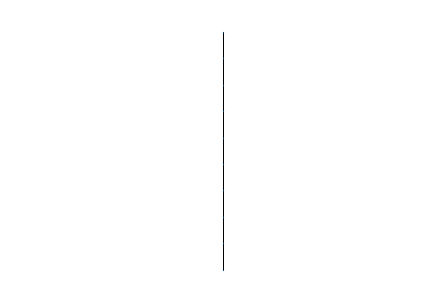

In [84]:
nx.draw(A,pos,node_size=0.1)
#plt.savefig('plot/project_net_arts.png',dpi = 300,backend = 'cairo')
plt.savefig('plot/project_net_arts.png',dpi = 300)

In [64]:
pos = nx.circular_layout(U)
#pos = nx.kamada_kawai_layout(U)
#pos = nx.spring_layout(U)

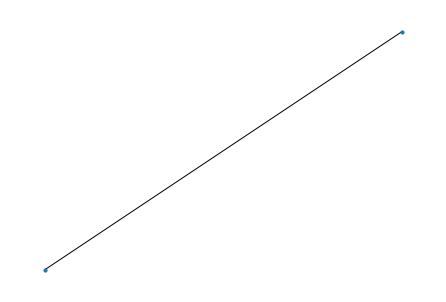

In [65]:
nx.draw(U,pos,node_size=10)
plt.savefig('plot/project_net_arts.png',dpi = 300,backend = 'cairo')

# analisi del network

### density

In [54]:
def density(G):
    return 2* G.number_of_edges()/(G.number_of_nodes() * (G.number_of_nodes() - 1))
density(A), density(U)

(0.13725490196078433, 0.20838921315062256)

### distribuzione di grado

Counter({1: 7, 2: 4, 3: 4, 5: 1, 4: 1, 6: 1})


(1.0, 10000.0, 1e-05, 1.0)

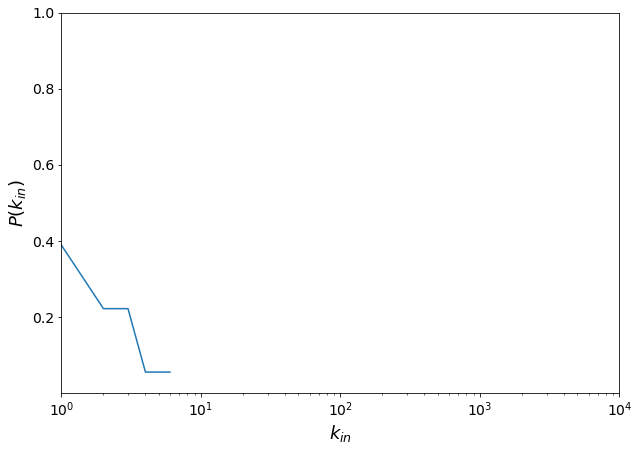

In [55]:
from collections import Counter 
import matplotlib.pyplot as plt

indeg=dict(A.degree()).values()
degin_distri=Counter(indeg)
print(degin_distri)


x=[]
y=[]

for i in sorted(degin_distri):   
    x.append(i)
    y.append(degin_distri[i]/len(A))

plt.figure(figsize=(10,7))    
plt.plot(x,y)

plt.xlabel('$k_{in}$', fontsize=18)
plt.ylabel('$P(k_{in})$', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.yscale('linear')
plt.xscale('log')
plt.axis([1,10000,0.00001,1.0])

In [ ]:
### clustering

In [ ]:
### 